### Initialize the environment

In [44]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [46]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [47]:
run=1
date_time='2017-02-20_2227' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [48]:
config

{u'dbns': {u'GE': {u'batchSize': 5,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.02],
   u'persistent': True},
  u'ME': {u'batchSize': 5,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [20],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': True},
  u'SM': {u'batchSize': 5,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [20, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.04],
   u'persistent': True}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 5,
  u'layersNodes': [24, 3],
  u'lr': [0.01, 0.01],
  u'persistent': True},
 u'uuid': u'647

### Load the dataset and visualize the input of the pathways

In [49]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [50]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

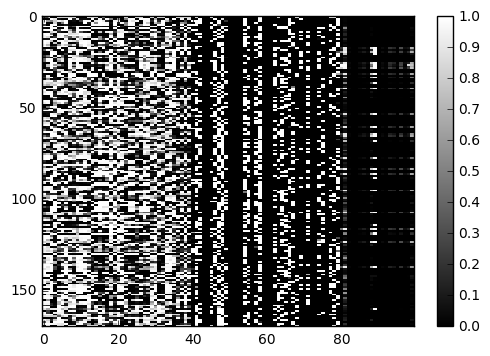

In [51]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [52]:
joint_layer[1:10,1:10]

array([[  5.94159868e-03,   9.99901474e-01,   8.88898075e-01,
          5.80612868e-02,   8.06531310e-03,   1.14540372e-03,
          9.99300659e-01,   1.18075721e-01,   8.98437202e-01],
       [  6.10232413e-01,   4.97823179e-01,   7.83642888e-01,
          9.47817266e-01,   8.46726000e-01,   9.99523878e-01,
          1.29826991e-02,   4.94122319e-02,   4.42995504e-03],
       [  2.05933005e-02,   1.89436879e-02,   8.14292371e-01,
          7.70604685e-02,   4.79881942e-01,   9.90939558e-01,
          2.87564239e-03,   1.40710147e-02,   2.06782436e-03],
       [  5.43509843e-04,   9.99847591e-01,   9.99291837e-01,
          1.21033275e-02,   5.15179767e-04,   1.00587837e-01,
          3.02571850e-03,   1.01952907e-03,   5.11022471e-03],
       [  9.99002159e-01,   9.95501399e-01,   7.14849755e-02,
          8.68413091e-01,   9.95131433e-01,   9.99302387e-01,
          1.56788185e-01,   3.50606859e-01,   9.85007048e-01],
       [  9.55770083e-05,   1.00000000e+00,   9.99990523e-01,
   

### Check the weights distributions

([array([  0.00000000e+00,   4.00000000e+00,   1.31000000e+02,
           1.69600000e+03,   6.45500000e+03,   8.07100000e+03,
           3.20800000e+03,   3.61000000e+02,   1.10000000e+01,
           0.00000000e+00]),
  array([  1.00000000e+00,   1.50000000e+01,   4.03000000e+02,
           2.95100000e+03,   7.46600000e+03,   6.69600000e+03,
           2.18800000e+03,   2.13000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([    0.,    11.,   276.,  1970.,  6239.,  7617.,  3354.,   449.,
            21.,     0.]),
  array([  0.00000000e+00,   6.00000000e+00,   2.28000000e+02,
           2.50900000e+03,   7.71700000e+03,   7.24000000e+03,
           2.05300000e+03,   1.80000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.20000000e+01,   3.42000000e+02,
           3.01700000e+03,   7.88200000e+03,   6.67300000e+03,
           1.84600000e+03,   1.61000000e+02,   4.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,  

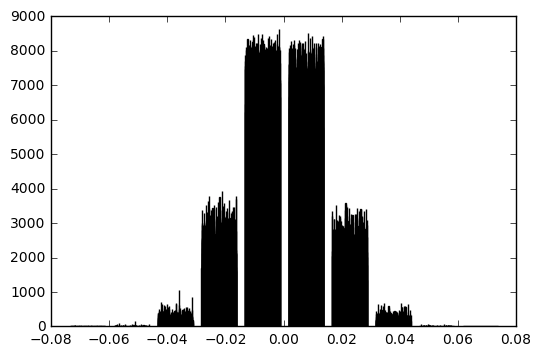

In [53]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x145727c10>,
 <a list of 3 Text xticklabel objects>)

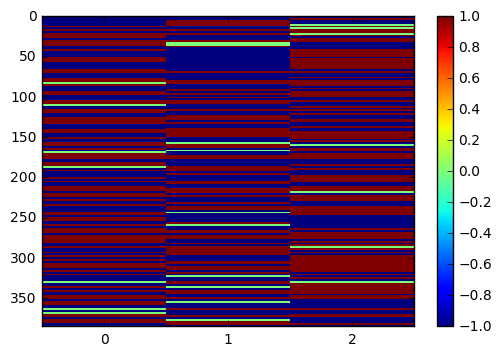

In [54]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x145036510>,
 <a list of 3 Text xticklabel objects>)

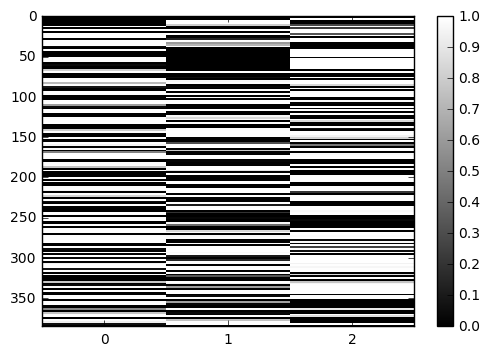

In [55]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 84.,   0.,   0.,   0.,   0.,   2.,   1.,   4.,   3.,  76.]),
  array([ 90.,   3.,   1.,   2.,   1.,   0.,   3.,   3.,   4.,  63.]),
  array([ 71.,   0.,   4.,   1.,   1.,   0.,   0.,   1.,   5.,  87.])],
 array([  5.20017709e-12,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

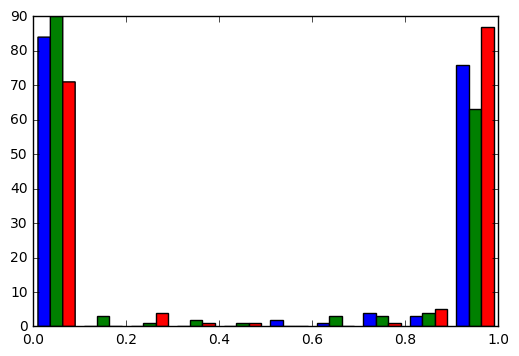

In [56]:
plt.hist(top_output)

In [57]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [58]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 27.,  27.,  18.,  12.,  17.,  26.,  15.,  28.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

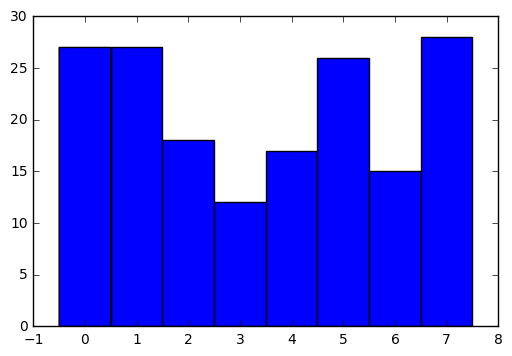

In [59]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [60]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [61]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [62]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


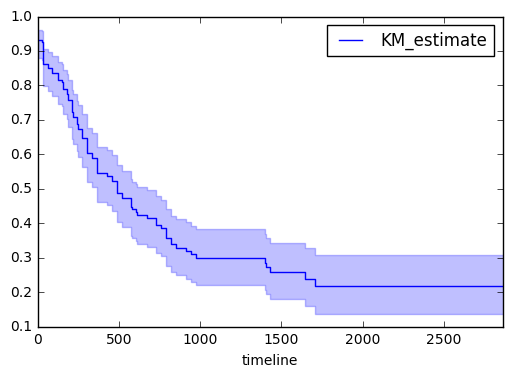

In [63]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

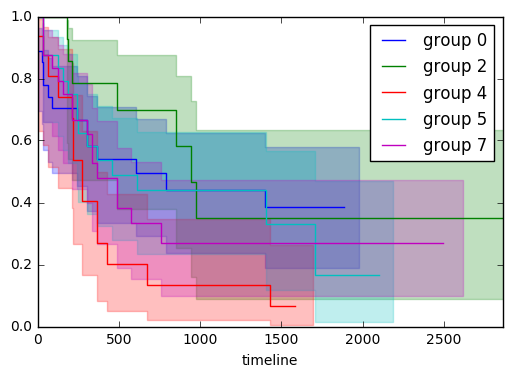

In [65]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [2,4,5,7]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)